In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model

import keras
from keras import layers

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist, cifar10

In [2]:
class_labels = { 0: "T-shirt/top", 
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat",
                5: "Sandal",
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle-boot" 
            }

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

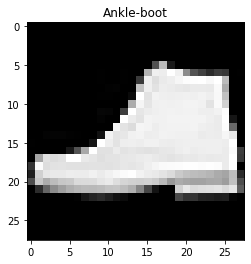

In [4]:
# show a random image from the training set
pixels, class_label = x_train[42], class_labels[y_train[42]]
plt.title(str(class_label))
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, x_test.shape) 

(60000, 28, 28) (10000, 28, 28)


In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
# First Encoder model

def Encoder(input_img):
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)
    return encoded

In [18]:
# First Decoder model

def Decoder(encoded):
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(1, activation='sigmoid')(decoded)
    return decoded

In [19]:
# First Autoencoder model

input = Input(shape=(28, 28, 1))
encoder = Encoder(input)
decoder = Decoder(encoder)
autoencoder = Model(input, decoder)
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_18 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 dense_19 (Dense)            (None, 28, 28, 64)        8256      
                                                                 
 dense_20 (Dense)            (None, 28, 28, 32)        2080      
                                                                 
 dense_21 (Dense)            (None, 28, 28, 64)        2112      
                                                                 
 dense_22 (Dense)            (None, 28, 28, 128)       8320      
                                                                 
 dense_23 (Dense)            (None, 28, 28, 1)         129 

In [22]:
autoencoder.fit(x_train, x_train, epochs = 1, batch_size = 64, validation_data = (x_test, x_test)) 

938/938 [==============================] - 113s 121ms/step - loss: 0.2409 - val_loss: 0.2425


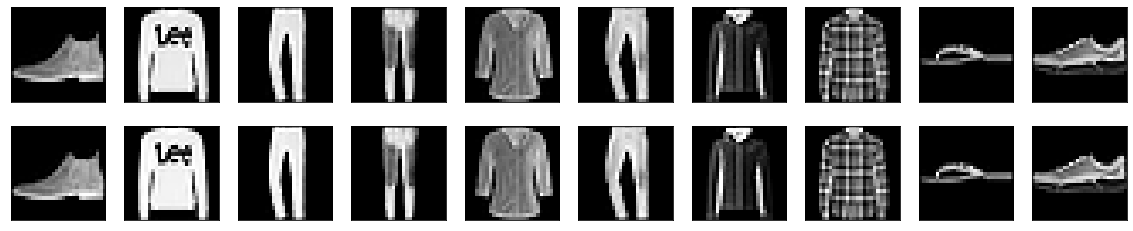

In [23]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show() 